In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


FileNotFoundError: [Errno 2] No such file or directory: './results/2d/histamine/gene_expression/ndp/histamine_geneexpr_snodep/loss_history.npy'

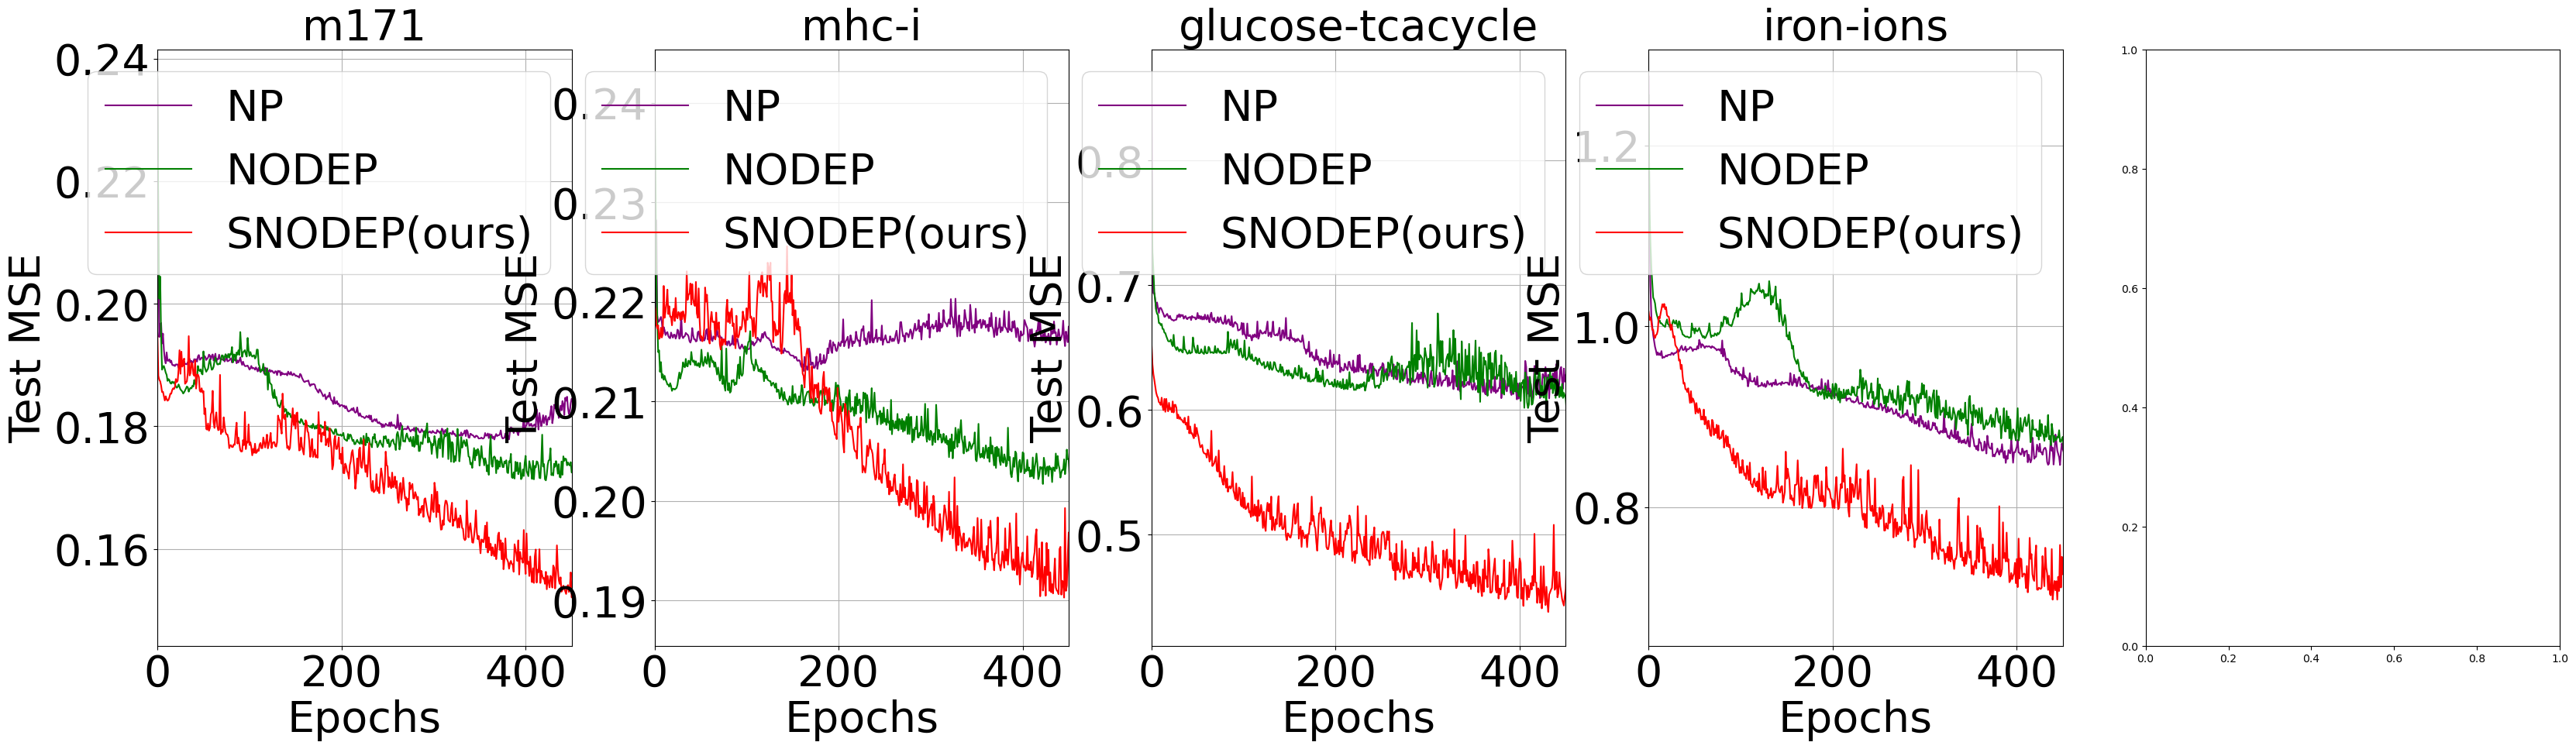

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pathways and cases
# pathways = ['m171', 'bcaa', 'mhc-i', 'glucose-tcacycle', 'ironion']
pathways = ['m171', 'mhc-i', 'glucose-tcacycle', 'ironion']
# pathways = ['bcaa']
# pathways = ['m171', 'bcaa', 'mhc-i', 'glucose-tcacycle']

cases = ['gene_expression', 'flux', 'flux_knockout_gene_added', 'metabolites', 'metabolites_knockout_gene_added']

# cases = ['gene_expression']
# cases =['flux', 'flux_knockout_gene_added', 'metabolites']
# freqs = [0.8, 0.6, 0.4]


# for case 3 only
# pathways = ['m171', 'bcaa']
# cases = ['metabolites_knockout_gene_added', 'metabolites']

# freqs = [1, 1, 1]
freqs = [1]
# Function to load data
def load_data(pathway, case, dep_type, freq=1):
    if case == 'gene_expression':
        base_path = f'./results_new/{pathway}/{case}/{pathway}_geneexpr_{dep_type}'
    else:
        if 'knockout' in case:
            base_path = f'./results_new/{pathway}/{case}/multiple_gene/{pathway}_{case}_{dep_type}'
        else:
            base_path = f'./results_new/{pathway}/{case}/{pathway}_{case}_{dep_type}'
    data = {
        'test_loss': np.load(f'{base_path}/loss_history.npy'),
        'test_mse': np.load(f'{base_path}/test_mse_history.npy')
    }
    return data

# Function to load data
def load_data_old(pathway, case, dep_type):
    if case=='metabolites_knockout_gene_added':
        case2= 'metabolites_reaction_knockout_gene_added'
    elif case== 'flux_knockout_gene_added':
        case2= 'flux_reaction_knockout_gene_added'
    else:
        case2= case
    if case == 'gene_expression':
        base_path = f'./results/2d/{pathway}/{case}/ndp/{pathway}_geneexpr_{dep_type}'
    elif 'knockout' in case:
        base_path = f'./results/2d/{pathway}/{case}/multiple_gene/ndp/{pathway}_{case2}_{dep_type}'
    else:
        base_path = f'./results/2d/{pathway}/{case}/ndp/{pathway}_{case}_{dep_type}'
    data = {
        'test_loss': np.load(f'{base_path}/loss_history.npy'),
        'test_mse': np.load(f'{base_path}/test_mse_history.npy')
    }
    return data

# # Function to load data
# def load_data_old(pathway, case, dep_type):
#     if case == 'gene_expression':   
#         base_path = f'./results/2d/{pathway}/{case}/ndp/{pathway}_geneexpr_{dep_type}'
#     else:
#         base_path = f'./results/2d/{pathway}/{case}/ndp/{pathway}_{case}_{dep_type}'
#     data = {
#         'test_loss': np.load(f'{base_path}/loss_history.npy'),
#         'test_mse': np.load(f'{base_path}/test_mse_history.npy')
#     }
#     return data

def viz_plot(pathways, cases, freqs, metric='test_mse', log_scale=False, save_fig=False):
    # Loop over pathways
    for i, pathway in enumerate(pathways):
        # Initialize plots for each pathway
        fig, axes = plt.subplots(1, len(cases), figsize=(40, 2*len(pathways)), sharex='col')
        # fig, axes = plt.subplots(1, len(cases), figsize=(10, 6), sharex='col')
        fig.suptitle(f'Comparison of Test MSE between nodep and snodep for {pathway}')
        
        for j, case in enumerate(cases):

            data_nodep = load_data_old(pathway, case, 'nodep')
            data_snodep = load_data_old(pathway, case, 'snodep')
            # data_nodep = load_data(pathway, case, 'nodep')
            # data_snodep = load_data(pathway, case, 'snodep')
            data_np = load_data(pathway, case, 'np')
            
            # Plot Test MSE
            axes[j].plot(data_nodep[metric][:450], label='nodep', color='g')
            axes[j].plot(data_snodep[metric][:450], label='snodep', color='r')
            axes[j].plot(data_np[metric][:450], label='NP', color='purple')
            axes[j].set_xlim([0, 450])  # Set x range to 450
            axes[j].set_title(f'{case}')
            axes[j].set_ylabel('Test MSE')
            axes[j].legend(loc='upper right')
            
        # Adjust layout and show the figure
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        if save_fig:
            fig.savefig(f'./paper_figures/in_progress/{metric}_comparison_irregular3_{pathway}.png')
        if log_scale:
            plt.yscale('log')
        plt.show()

def save_plot(pathways, cases, freqs, metric='test_mse', log_scale=False, save_fig=False, all_together=False):
    # Loop over pathways
    out_dfs= {}
    for i, case in enumerate(cases):
        temp_df= pd.DataFrame(index=['NP', 'NODEP', 'SNODEP'], columns=pathways)
        if all_together:
            fig, axes = plt.subplots(1, len(pathways), figsize=(40, 2*len(cases)), sharex='col')

            for j, pathway in enumerate(pathways):

                data_nodep = load_data_old(pathway, case, 'nodep')
                data_snodep = load_data_old(pathway, case, 'snodep')
                data_np = load_data(pathway, case, 'np')
                
                # Plot Test MSE
                axes[j].plot(data_np[metric], label='NP', color='purple')
                axes[j].plot(data_nodep[metric], label='NODEP', color='g')
                axes[j].plot(data_snodep[metric], label='SNODEP(ours)', color='r')
                if pathway == 'ironion':
                    pathway= 'iron-ions'
                    axes[j].set_title(f'{pathway}', fontsize=40)
                else:
                    axes[j].set_title(f'{pathway}', fontsize=40)
                axes[j].set_xlim([0, 450])
                axes[j].set_ylabel('Test MSE', fontsize=40)
                axes[j].set_xlabel('Epochs', fontsize=40)
                axes[j].legend(loc='upper right', fontsize=40)
                axes[j].tick_params(axis='both', which='major', labelsize=40)
                axes[j].grid(True)
                temp_df.loc['NP', pathway]= data_np[metric][-1]
                temp_df.loc['NODEP', pathway]= data_nodep[metric][-1]
                temp_df.loc['SNODEP', pathway]= data_snodep[metric][-1]
            out_dfs[case]= temp_df
            # Adjust layout and show the figure
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            if log_scale:
                plt.yscale('log')
            if save_fig:
                fig.savefig(f'./paper_figures/updated/all_together/{metric}_comparison_{case}.png')
            plt.show()
        else:
            for j, pathway in enumerate(pathways):
                fig, axes = plt.subplots(1, 1, figsize=(6, 4))
                data_nodep = load_data_old(pathway, case, 'nodep')
                data_snodep = load_data_old(pathway, case, 'snodep')
                data_np = load_data(pathway, case, 'np')
                # Plot Test MSE
                axes.plot(data_np[metric], label='NP', color='purple')
                axes.plot(data_nodep[metric], label='NODEP', color='g')
                axes.plot(data_snodep[metric], label='SNODEP(ours)', color='r')
                # axes.set_title(f'{pathway}')
                axes.set_xlim([0, 450])
                axes.set_ylabel('Test MSE', fontsize=20)
                axes.set_xlabel('Epochs', fontsize=20)
                axes.legend(loc='upper right', fontsize=20)
                axes.tick_params(axis='both', which='major', labelsize=20)
                plt.tight_layout()  # Adjust layout
                if log_scale:
                    axes.set_yscale('log')
                if save_fig:
                    fig.savefig(f'./paper_figures/updated/{metric}_comparison_{pathway}_{case}.png')
                plt.show()
        
    return out_dfs

# viz_plot(pathways, cases, freqs, metric='test_mse', log_scale=True)
dfs= save_plot(pathways, cases, freqs, metric='test_mse', log_scale=True, all_together=True, save_fig=False)

for key, df in dfs.items():
    # Apply styling to highlight the minimum value in each column
    styled_df = df.style.apply(
        lambda column: ['background-color: yellow' if value == column.min() else '' for value in column],
        axis=0
    )
    
    print(key, '\n')
    print(styled_df.to_latex())
    print('\n\n')

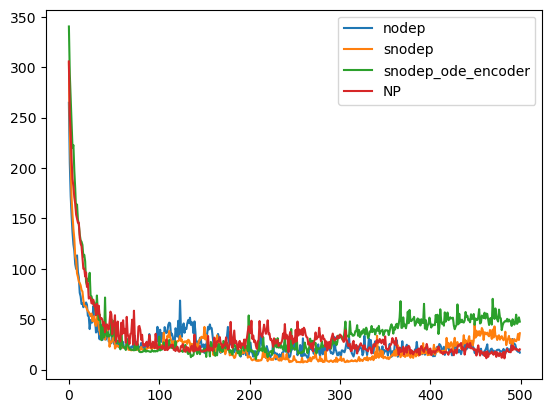

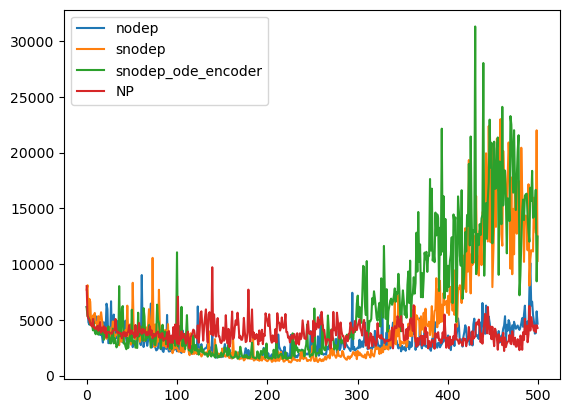

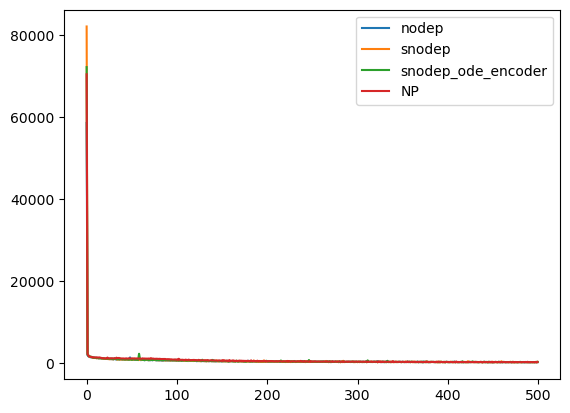

In [59]:
# copasi_model_id= 'BIOMD0000000105'
copasi_model_id= 'BIOMD0000000705'


# context range 20 20, extra target range 10 10
# suffix= ''
# suffix= '_15_5'
# suffix= '_10_5_irregular_freq_0.4'
# suffix= '_10_10'
# suffix= '_10_5'
# suffix= '_40_20'
suffix= '_40_20_irregular_freq_0.4'

nodep_mse= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_nodep{suffix}/test_mse_history.npy'
snodep_mse= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep{suffix}/test_mse_history.npy'
snodep_ode_encoder_mse= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep_ode_encoder{suffix}/test_mse_history.npy'
np_mse= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_np{suffix}/test_mse_history.npy'

nodep_loss= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_nodep{suffix}/loss_history.npy'
snodep_loss= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep{suffix}/loss_history.npy'
snodep_ode_encoder_loss= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep_ode_encoder{suffix}/loss_history.npy'
np_loss= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_np{suffix}/loss_history.npy'


nodep_logp= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_nodep{suffix}/test_logp_history.npy'
snodep_logp= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep{suffix}/test_logp_history.npy'
snodep_ode_encoder_logp= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_snodep_ode_encoder{suffix}/test_logp_history.npy'
np_logp= f'/Users/rssantanu/Desktop/codebase/neural_process_repo/results_new/copasi/{copasi_model_id}/copasi_np{suffix}/test_logp_history.npy'


nodep_mse= np.load(nodep_mse)
snodep_mse= np.load(snodep_mse)
snodep_ode_encoder_mse= np.load(snodep_ode_encoder_mse)
np_mse= np.load(np_mse)

nodep_logp= np.load(nodep_logp)
snodep_logp= np.load(snodep_logp)
snodep_ode_encoder_logp= np.load(snodep_ode_encoder_logp)
np_logp= np.load(np_logp)

nodep_loss= np.load(nodep_loss)
snodep_loss= np.load(snodep_loss)
snodep_ode_encoder_loss= np.load(snodep_ode_encoder_loss)
np_loss= np.load(np_loss)

plt.plot(nodep_mse, label='nodep')
plt.plot(snodep_mse, label='snodep')
plt.plot(snodep_ode_encoder_mse, label='snodep_ode_encoder')
plt.plot(np_mse, label='NP')
plt.legend()
# plt.yscale('log')
plt.show()

plt.plot(nodep_logp, label='nodep')
plt.plot(snodep_logp, label='snodep')
plt.plot(snodep_ode_encoder_logp, label='snodep_ode_encoder')
plt.plot(np_logp, label='NP')
plt.legend()
plt.show()

plt.plot(nodep_loss, label='nodep')
plt.plot(snodep_loss, label='snodep')
plt.plot(snodep_ode_encoder_loss, label='snodep_ode_encoder')
plt.plot(np_loss, label='NP')
plt.legend()
plt.show()

